In [1]:
import networkx as nx
import json
import collections
import itertools
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from collections import defaultdict
from heapq import *

# POINT 1

# Definition of jaccard similarity

The Jaccard similarity basically measures the similarity between finite sample sets, and is defined as the cardinality of the intersection of a serie of sets divided by the cardinality of the union of that serie of sets. In our case, we want to find jaccard similarity between two sets A and B, ergi it is the ration of cardinality of A ∩ B and A ∪ B.

In [2]:
def jaccard_sim(set1,set2):
    #get set A and B and call in the set function to convert
    set1=set(set1)
    set2=set(set2)
    #apply the Jaccard similarity to return a number
    return len(set1 & set2)/len( set1 | set2)

### JSON Helper Function

Define some functions to read and store data

In [5]:
def load_json(name):
    with open( name + '.json', 'r') as f:
        return json.load(f)

In [6]:
def save_json(name_file, data ):
    with open( name_file + '.json', 'w') as f:
        return json.dump(data, f,indent=3)

Read the Json file from local

In [7]:
data=load_json('reduced_dblp')

Create an empty graph

In [8]:
G=nx.Graph()

Define a function to create a dictionaty usefull to access information very fast

In [9]:
def dict_name(data):
    

    DICT={}
  
    for i in tqdm(range(len(data))):

        for auth in range(len(data[i]['authors'])):

            if data[i]['authors'][auth]['author_id'] not in DICT.keys():

                DICT[data[i]['authors'][auth]['author_id']]={'author_name':data[i]['authors'][auth]['author'],
                                               'id_publication_int':[data[i]['id_publication_int']],
                                               'id_conference_int':[data[i]['id_conference_int']]}    

            else:
                DICT[data[i]['authors'][auth]['author_id']]['id_publication_int'].append(data[i]['id_publication_int']),
                DICT[data[i]['authors'][auth]['author_id']]['id_conference_int'].append(data[i]['id_conference_int'])    




    return DICT        

In [10]:
data_small=dict_name(data) 

100%|███████████████████████████████████| 3096/3096 [00:00<00:00, 52471.59it/s]


# Add nodes

Define a function to add nodes to graph.

Each node of the graph is an author ID

In [11]:
def graph_complete(data):
    G=nx.Graph()
    for k,v in tqdm(data.items()):
        G.add_node(k, **v)  #**v take the dict like attr
    return G

In [12]:
G=graph_complete(data_small)

100%|██████████████████████████████████| 7771/7771 [00:00<00:00, 199244.05it/s]


Define a function to create a dictionary which keys are the publication, and the id the list of conferences

In [13]:
def pub_id_f(data):
    
    dict_publication={}
    for i in tqdm(range(len(data))):
        dict_publication[data[i]["id_publication_int"]]=[]
        for j in range(len(data[i]["authors"])):
            dict_publication[data[i]["id_publication_int"]].append(data[i]["authors"][j]["author_id"]) 
        
                    
    return dict_publication

In [14]:
pub_id=pub_id_f(data)

100%|██████████████████████████████████| 3096/3096 [00:00<00:00, 206388.72it/s]


# Add edges using jaccard similarity as weight

In [15]:
def add_weighted_edges(pub_id,graph):

    for pub in pub_id.keys():
        
        for (i,v) in itertools.combinations(pub_id[pub], 2):
        
            graph.add_edge(i,v, weight= 1-jaccard_sim(graph.node[i]['id_publication_int'],
                                                      graph.node[v]['id_publication_int']))

    return graph

In [16]:
G=add_weighted_edges(pub_id,G)   

In [17]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 7771\nNumber of edges: 16489\nAverage degree:   4.2437'

# POINT 2

## SUBPOINT 1

Given a conference in input, return the subgraph induced by the set of authors who published at the input conference at least once. Once you have the graph, compute some centralities measures (degree, closeness, betweeness) and plot them.

In [18]:
# We use function subgraph, that wants as parameter the list of nodes that are used in the subgraph

Ask to user a conference in input

In [19]:
control=False
while control==False:


    print("Insert conference id:")
    conf_input=int(input())
    if conf_input not in pub_id.keys():
        print("ERROR\nConference ID not found")
        print("Try another time")
        print("\n")
    else:
        control=True


Insert conference id:
5854
ERROR
Conference ID not found
Try another time


Insert conference id:
Exit


ValueError: invalid literal for int() with base 10: 'Exit'

In [20]:
conf_input=12693

In [21]:
def conference_subgraph(data, conf_id):
    
    return G.subgraph([k for k in tqdm(data.keys()) if conf_id in data[k]['id_conference_int']])

In [22]:
K=conference_subgraph(data_small,conf_input)

100%|██████████████████████████████████| 7771/7771 [00:00<00:00, 777063.69it/s]


In [23]:
nx.info(K)

'Name: \nType: Graph\nNumber of nodes: 1589\nNumber of edges: 2821\nAverage degree:   3.5507'

Calculate degree centrality

In [22]:
degree = nx.degree_centrality(K)

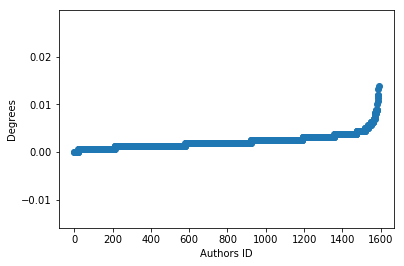

In [55]:
x= range(len(list(degree.values())))
y= sorted(list(degree.values()),reverse=False)
plt.scatter(x,y)
plt.xlabel("Authors ID")
plt.ylabel("Degrees")
plt.show()

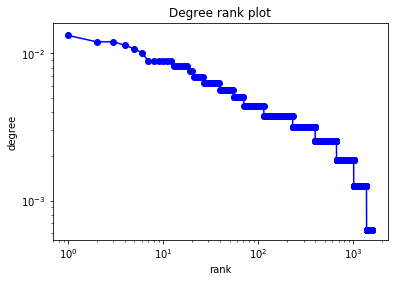

In [48]:
degree_sequence=sorted(degree.values(),reverse=True) # degree sequence

plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")
plt.show()

Closeness centrality

In [45]:
closeness=nx.closeness_centrality(K)

Betweeness centrality

In [46]:
betweeness = nx.betweenness_centrality(K,weight="weight")

In [47]:
betweeness

{24151: 0.0,
 255688: 7.936016659286172e-06,
 93126: 0.0,
 255926: 1.322669443214362e-05,
 9503: 2.0898177202786928e-05,
 9505: 1.1374957211643514e-05,
 255996: 0.0,
 8985: 0.0,
 256176: 2.3808049977858513e-06,
 114483: 1.4549363875357983e-06,
 255300: 0.0,
 8352: 0.0,
 17824: 0.0,
 17184: 0.0020369057737773606,
 9751: 0.00010953214612035736,
 16780: 0.0,
 8650: 0.003689000658235895,
 9317: 3.3476133765163493e-06,
 271706: 3.7160712928403507e-07,
 35691: 0.0,
 8315: 0.0001137268977831229,
 115211: 1.454936387535798e-06,
 99555: 2.6453388864287235e-07,
 8861: 0.0038643639520727973,
 8860: 0.004040150500131561,
 9664: 0.0021030188634191043,
 364858: 0.0,
 204853: 0.0,
 114821: 7.936016659286172e-06,
 101707: 0.0,
 114552: 0.0,
 9096: 0.0,
 8659: 0.003869684862290083,
 225947: 0.0,
 273515: 0.0012932608329083762,
 10660: 0.0,
 8863: 0.003962513582870428,
 14854: 0.0,
 34402: 0.0005051756128455988,
 9003: 0.001768035479841034,
 365188: 0.0,
 12375: 0.0,
 156372: 0.0009314073403531474,
 200

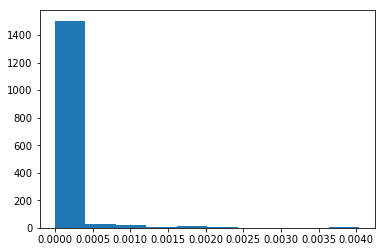

In [56]:
x= sorted(list(betweeness.keys()),reverse=True)
y= sorted(list(betweeness.values()),reverse=True)
plt.hist( y)
plt.show()

In [57]:
def centrality_scatter(dict1,dict2, ylab="",xlab="",title="",line=False):
 # Create figure and drawing axis
    fig = plt.figure(figsize=(7,7))
    ax1 = fig.add_subplot(111)
    # Create items and extract centralities
    items1 = sorted(dict1.items())
    items2 = sorted(dict2.items())
    xdata=[b for a,b in items1]
    ydata=[b for a,b in items2]

    # Add each actor to the plot by ID
    for p in range(len(items1)):
        ax1.text(x=xdata[p], y=ydata[p],s=str(items1[p][0]), color="b")

    if line:
        # use NumPy to calculate the best fit
        slope, yint = np.polyfit(xdata,ydata,1)
        xline = plt.xticks()[0]
        yline = list(map(lambda x: slope*x+yint,xline))
        ax1.plot(xline,yline,ls='--',color='r')
    # Set new x- and y-axis limits
    plt.xlim((0.0,max(xdata)+(.15*max(xdata))))
    plt.ylim((0.0,max(ydata)+(.15*max(ydata))))
    # Add labels and save
    ax1.set_title(title)
    ax1.set_xlabel(xlab)
    ax1.set_ylabel(ylab) 
    plt.show()

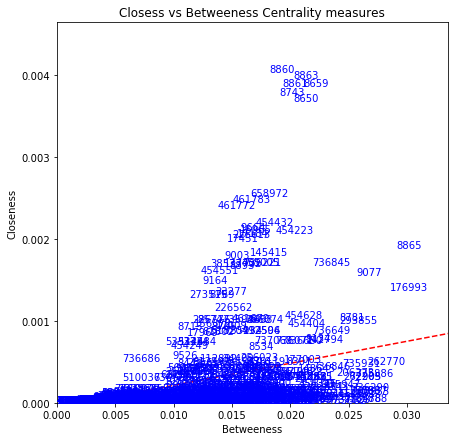

In [58]:
centrality_scatter(closeness,betweeness,"Closeness", "Betweeness", "Closess vs Betweeness Centrality measures", True)

# Point 2.2

In [23]:
def author_subgraph(graph,n, d):
  
   return nx.ego_graph(G,n, radius=d, center=True, undirected=True)

In [42]:
def draw_author_subgraph(author_distance, node_input):
    set_color=[ 'blue' if node==node_input else 'red' for node in author_distance]
    return nx.draw_networkx(author_distance, with_labels=False,node_color=set_color, 
                   labels=nx.get_node_attributes(author_distance,'author_name'), 
                   font_weight='bold',node_size=5,edge_size=0.004,edge_color="grey")

In [25]:
author_distance= author_subgraph(G,7809, 2)

In [26]:
nx.info(author_distance)

'Name: \nType: Graph\nNumber of nodes: 458\nNumber of edges: 1875\nAverage degree:   8.1878'

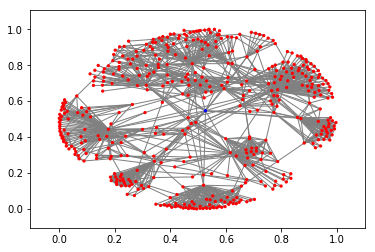

In [43]:
draw_author_subgraph(author_distance,7809)
plt.show()

# POINT 3.1

Aris id is 256176

In [24]:
aris=256176

Define a function to find the shortest path

In [25]:
lst_tot=[]
for xx in G.nodes(): 
    for yy in G[xx]:

        lst=(xx,yy,G[xx][yy]["weight"])
        lst_tot.append(lst)
        

In [26]:
def dijkstra_heap(edges, start, end):
    g = defaultdict(list)
    for node1,node2,weight in edges:
        g[node1].append((weight,node2))

    q = [(0,start,())] 
    seen=set()
    while q:
        (cost,v1,path) = heappop(q)
        if v1 not in seen:
            seen.add(v1)
            path = (v1, path)
            if v1 == end: return (cost)

            for c, v2 in g.get(v1, ()):
                if v2 not in seen:
                    heappush(q, (cost+c, v2, path))

    return float("inf")

Now take an author in input

In [27]:
control=False
while control==False:
    print("Type author id:")
    aut_input=int(input())
    if aut_input in G.nodes():
        control=True
    else:
        print("Invalid input:\nTry another time\n")

Type author id:
7801
Invalid input:
Try another time

Type author id:
7809


In [37]:
xx=17178
yy=aris

In [38]:
dijkstra_heap(lst_tot,xx,yy)

7.617124542124543

# Point 3.2

Write a Python software that takes in input a subset of nodes (cardinality smaller than 21) and returns, for each node of the graph, its GroupNumber

In [42]:
lst_tot

[(255206, 255207, 0.0),
 (255206, 16585, 0.0),
 (255206, 255208, 0.0),
 (255207, 255206, 0.0),
 (255207, 16585, 0.0),
 (255207, 255208, 0.0),
 (16585, 255206, 0.0),
 (16585, 255207, 0.0),
 (16585, 255208, 0.0),
 (255208, 255206, 0.0),
 (255208, 255207, 0.0),
 (255208, 16585, 0.0),
 (255280, 255281, 0.0),
 (255280, 3326, 0.0),
 (255281, 255280, 0.0),
 (255281, 3326, 0.0),
 (3326, 255280, 0.0),
 (3326, 255281, 0.0),
 (20405, 20407, 0.0),
 (20405, 18262, 0.8333333333333334),
 (20407, 20405, 0.0),
 (20407, 18262, 0.8333333333333334),
 (255339, 205380, 0.0),
 (255339, 115228, 0.0),
 (205380, 255339, 0.0),
 (205380, 115228, 0.0),
 (115228, 255339, 0.0),
 (115228, 205380, 0.0),
 (210891, 255394, 0.0),
 (210891, 255395, 0.0),
 (255394, 210891, 0.0),
 (255394, 255395, 0.0),
 (255395, 210891, 0.0),
 (255395, 255394, 0.0),
 (255405, 9308, 0.75),
 (255405, 175195, 0.5),
 (255405, 17178, 0.5),
 (255405, 166915, 0.75),
 (255405, 81113, 0.5),
 (255405, 558974, 0.5),
 (255405, 1100, 0.5),
 (255405, 43

In [30]:
for nodes in G:
    print(nodes)

255206
255207
16585
255208
255280
255281
3326
20405
20407
255339
205380
115228
210891
255394
255395
255405
9308
175195
17178
176994
73799
24151
255487
255488
3476
255489
166813
13781
9741
8757
255537
21462
255578
113776
255247
82068
255673
255688
255689
255690
255691
113346
15924
255814
200773
93126
23845
208589
127810
255902
255926
9503
9505
9068
9046
9069
9070
255950
255996
20199
124828
239007
189237
255823
256123
256124
8985
8987
8988
19285
19460
8612
255494
256146
256147
9771
256148
20336
256176
256177
255328
256188
256159
256133
256264
256265
256276
25696
255805
72882
72883
71582
71969
9772
114626
114625
114483
202882
256135
252278
83637
83639
255300
21056
70758
256482
256500
20392
8857
256366
255759
255760
8874
19794
9451
8350
8352
151570
43462
9388
1632
217858
271609
17344
16239
271610
8819
271611
16249
19355
16145
18433
223848
271612
175489
271613
17368
271614
17611
16521
168357
271615
271616
17509
17973
17974
16665
16837
16867
271623
17824
15938
271632
271633
16483
17423
15815

113875
450992
289860
48049
21246
450713
55057
21248
101024
11379
11044
218194
451000
451001
451002
219280
109346
451003
19752
370903
434030
18930
451004
19927
19926
24890
310307
451016
423665
450872
450873
20145
451023
20146
21053
451038
451039
292775
289481
130611
208906
118569
37279
290359
289830
101968
451061
451062
290640
122502
18049
156372
15959
44965
450973
28638
451095
28637
219731
115577
113112
69791
450990
364836
364972
450786
11073
451126
451127
25543
11074
138764
138182
55722
55724
451137
113826
451138
113618
451139
451140
8289
20606
451089
283443
14954
175929
451162
101498
20723
20088
265703
451176
451188
451189
451203
113876
451206
247769
451221
451222
201846
451223
250919
255831
290079
122973
23545
20141
451249
451260
433795
312013
451274
451275
451279
255406
451289
451290
451291
451292
113505
20370
20371
270517
270603
451298
84045
451304
451305
451187
47312
270089
20161
16023
250215
451322
241746
451324
369870
451329
113577
113578
12706
451343
210908
290578
451344
43709

2291
487903
261738
524135
524785
165140
33797
450945
450946
73069
524808
524810
140967
303208
166823
99449
243598
307432
83133
372926
194276
492453
434761
17895
44189
524814
523445
524815
101760
264689
189553
269977
110987
110988
207881
560231
226515
569676
204909
207909
444373
112564
189213
124550
569692
205166
264688
8368
8370
205088
569711
124731
111768
490760
207770
444506
569720
207886
226443
124619
226444
226445
226331
226332
461786
207947
111507
36386
207996
207936
111562
270021
111404
207870
444360
444456
444462
226529
444463
226733
264831
264717
256492
270012
205169
225845
124374
452744
569770
569771
209228
193705
193625
569772
226468
226469
569806
352150
569809
17451
124453
461718
225613
218828
217457
352164
17476
569829
199481
461659
569661
490729
444361
207988
560197
226339
569854
569833
17865
356731
225859
465003
356488
6317
6481
112171
226752
204997
205000
465026
112111
569863
444561
461701
269763
207956
569865
490736
569867
569868
569869
226379
355506
204831
111183
56987

9248
519765
149261
144058
143220
256513
71819
4017
4018
504378
77644
17084
518689
433797
433798
147369
454243
736646
490601
736616
132862
186967
8891
9546
624032
396074
8616
9734
114722
71429
737062
220122
454354
737064
736374
9517
737069
736736
737070
262522
454279
61651
35380
737083
147355
623217
398577
612507
560316
623632
560317
735996
311319
367933
68520
207624
548987
207154
712714
356385
207764
8500
650724
735883
275237
8872
736001
454233
245477
68896
70985
747352
70986
70988
490806
403240
518260
219990
220402
161202
239266
204888
433425
297269
620160
518111
444390
569780
490807
490865
517856
517861
519627
112229
209181
259398
220126
292329
828350
569667
828352
113446
226434
34771
226435
440148
290492
225799
158054
225801
451505
828362
9193
21149
450001
6056
20631
148131
560272
111207
828338
569678
829214
123125
80969
80970
8758
829219
312154
268590
180895
786559
228823
85982
115330
131052
829220
16452
255818
272100
82011
317546
2162
2163
265560
633233
64933
18541
17742
524370
18

In [55]:
inputNodes = [20405, 20407]
groupNumbers = {}

for e in inputNodes:
    groupNumbers[e] = []

for node in tqdm(G):
    if len(G[node]) > 21:
        continue
    currentLow = 0
    gNumber = 0
    for k in inputNodes:
        result= dijkstra_heap(lst_tot,k,node)
        if result == 'inf': continue
        if result < currentLow:
            currentLow = result
            gNumber= k
    if gNumber == 0: continue
    groupNumbers[gNumber].append(node)

        

100%|██████████████████████████████████████| 7771/7771 [15:53<00:00,  8.15it/s]


In [40]:
len(G[17178])

3

In [61]:
inputNodes = [20405, 256176]
groupNumbers = {}

for e in inputNodes:
    groupNumbers[e] = []

for node in tqdm(G):
    if len(G[node]) > 21:
        continue
    currentLow = 1000000
    gNumber = 0
    for k in inputNodes:
        result= dijkstra_heap(lst_tot,k,node)
        if result == 'inf': continue
        if result < currentLow:
            currentLow = result
            gNumber= k
    if gNumber == 0: continue
    groupNumbers[gNumber].append(node)

        


  0%|                                        | 18/7771 [00:02<18:08,  7.13it/s]
Exception in thread Thread-12:
Traceback (most recent call last):
  File "C:\Users\lenovo\Anaconda3\lib\threading.py", line 916, in _bootstrap_inner
    self.run()
  File "C:\Users\lenovo\Anaconda3\lib\site-packages\tqdm\_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "C:\Users\lenovo\Anaconda3\lib\_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration
100%|██████████████████████████████████████| 7771/7771 [17:03<00:00,  7.59it/s]


In [54]:
groupNumbers[20405].append(2255)

In [65]:
len(groupNumbers[20405])

203